In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv("car data.csv") 

In [30]:
print("✅ Data Loaded Successfully!\n")
df.head()

✅ Data Loaded Successfully!



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [32]:
df.shape


(301, 9)

In [33]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [34]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [35]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [36]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

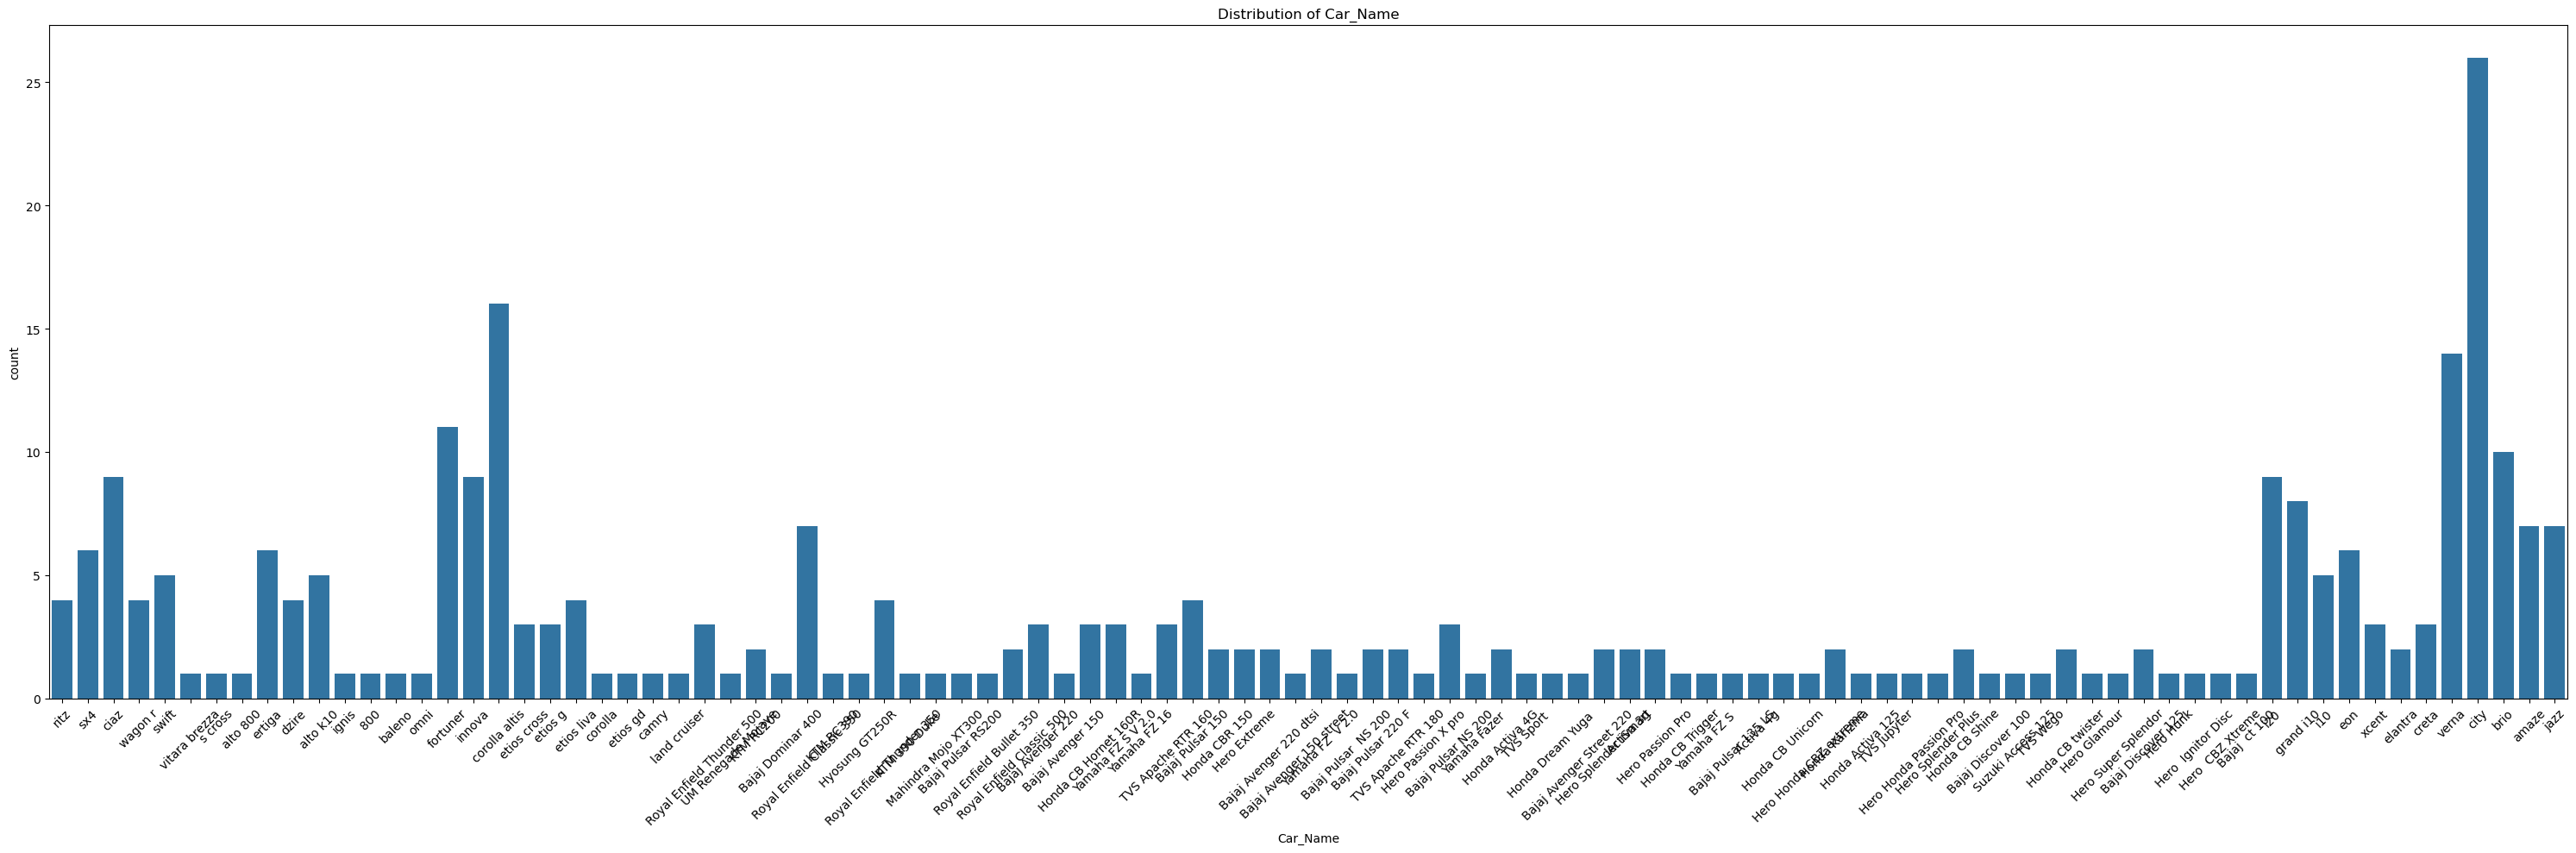

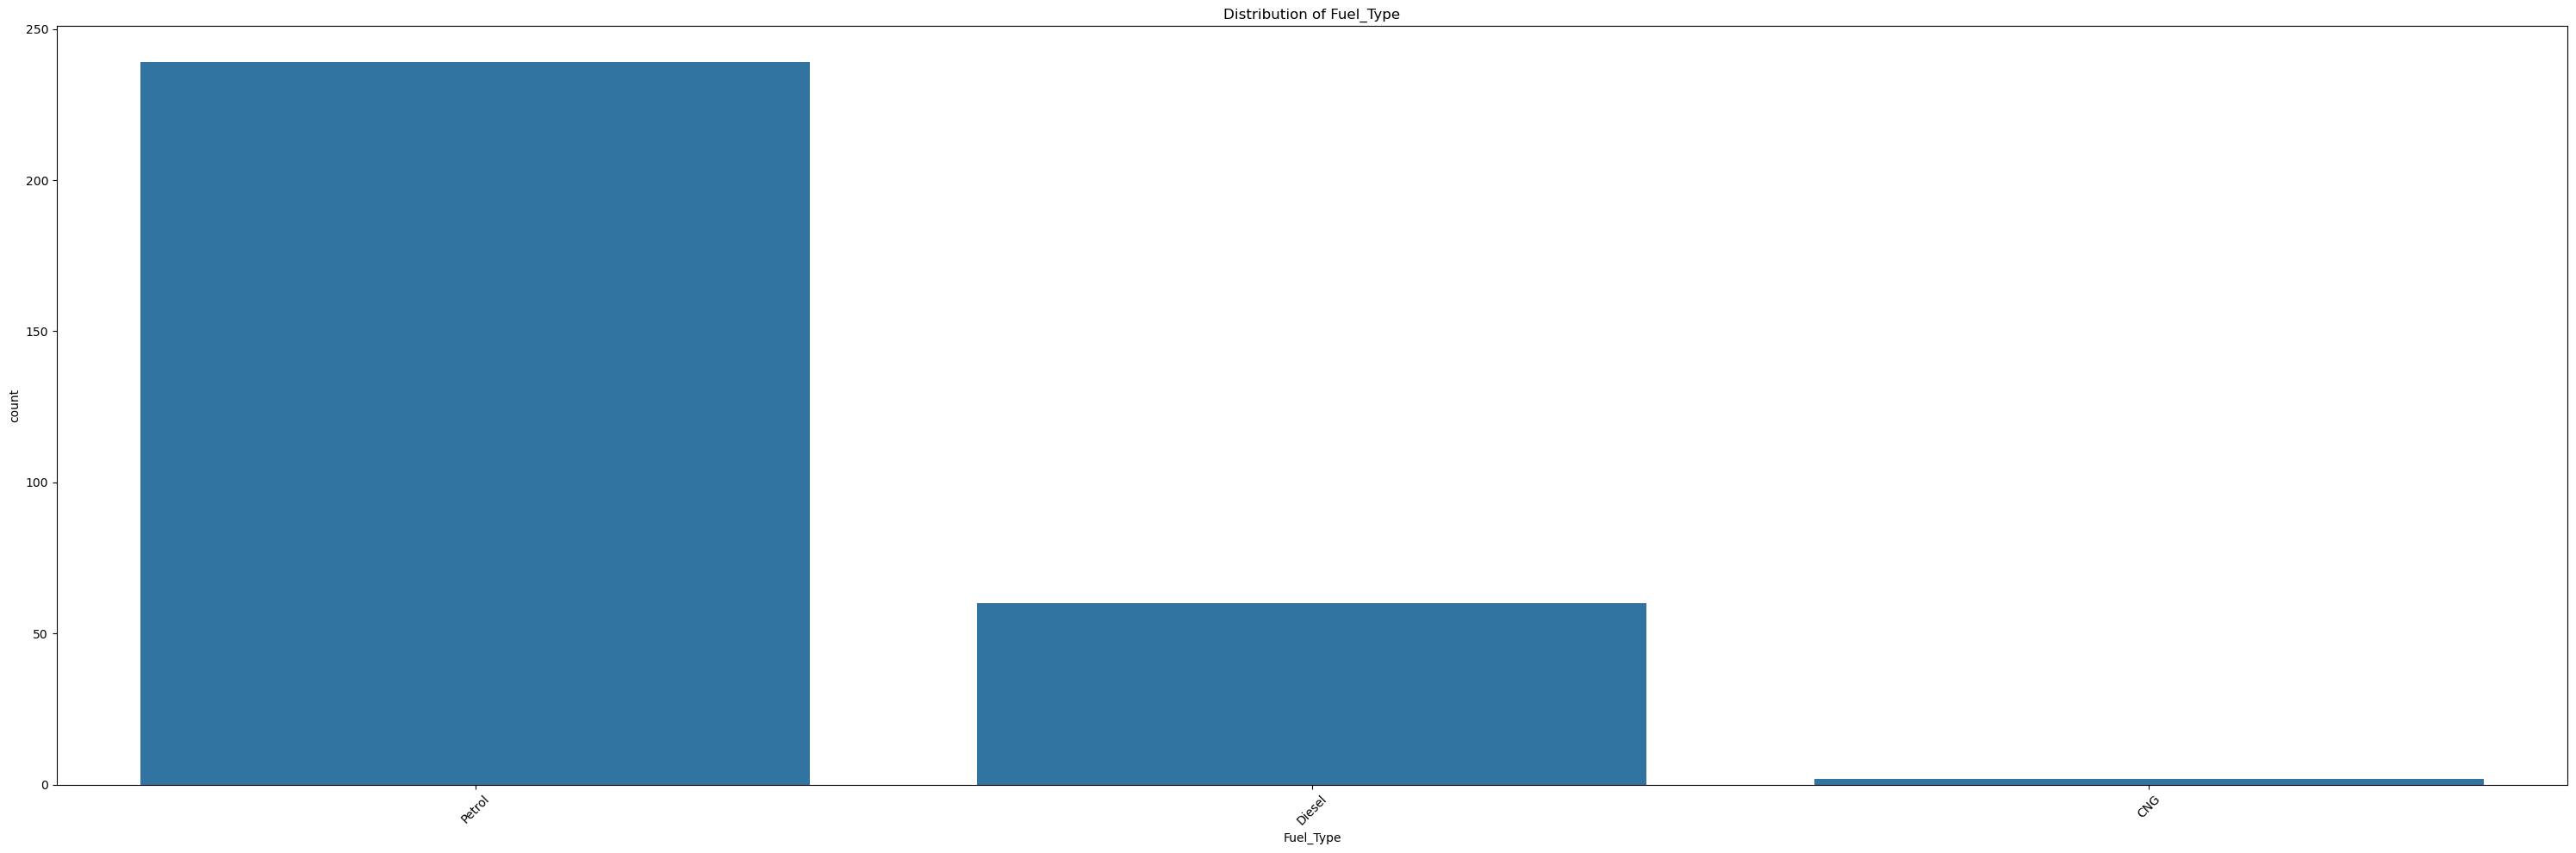

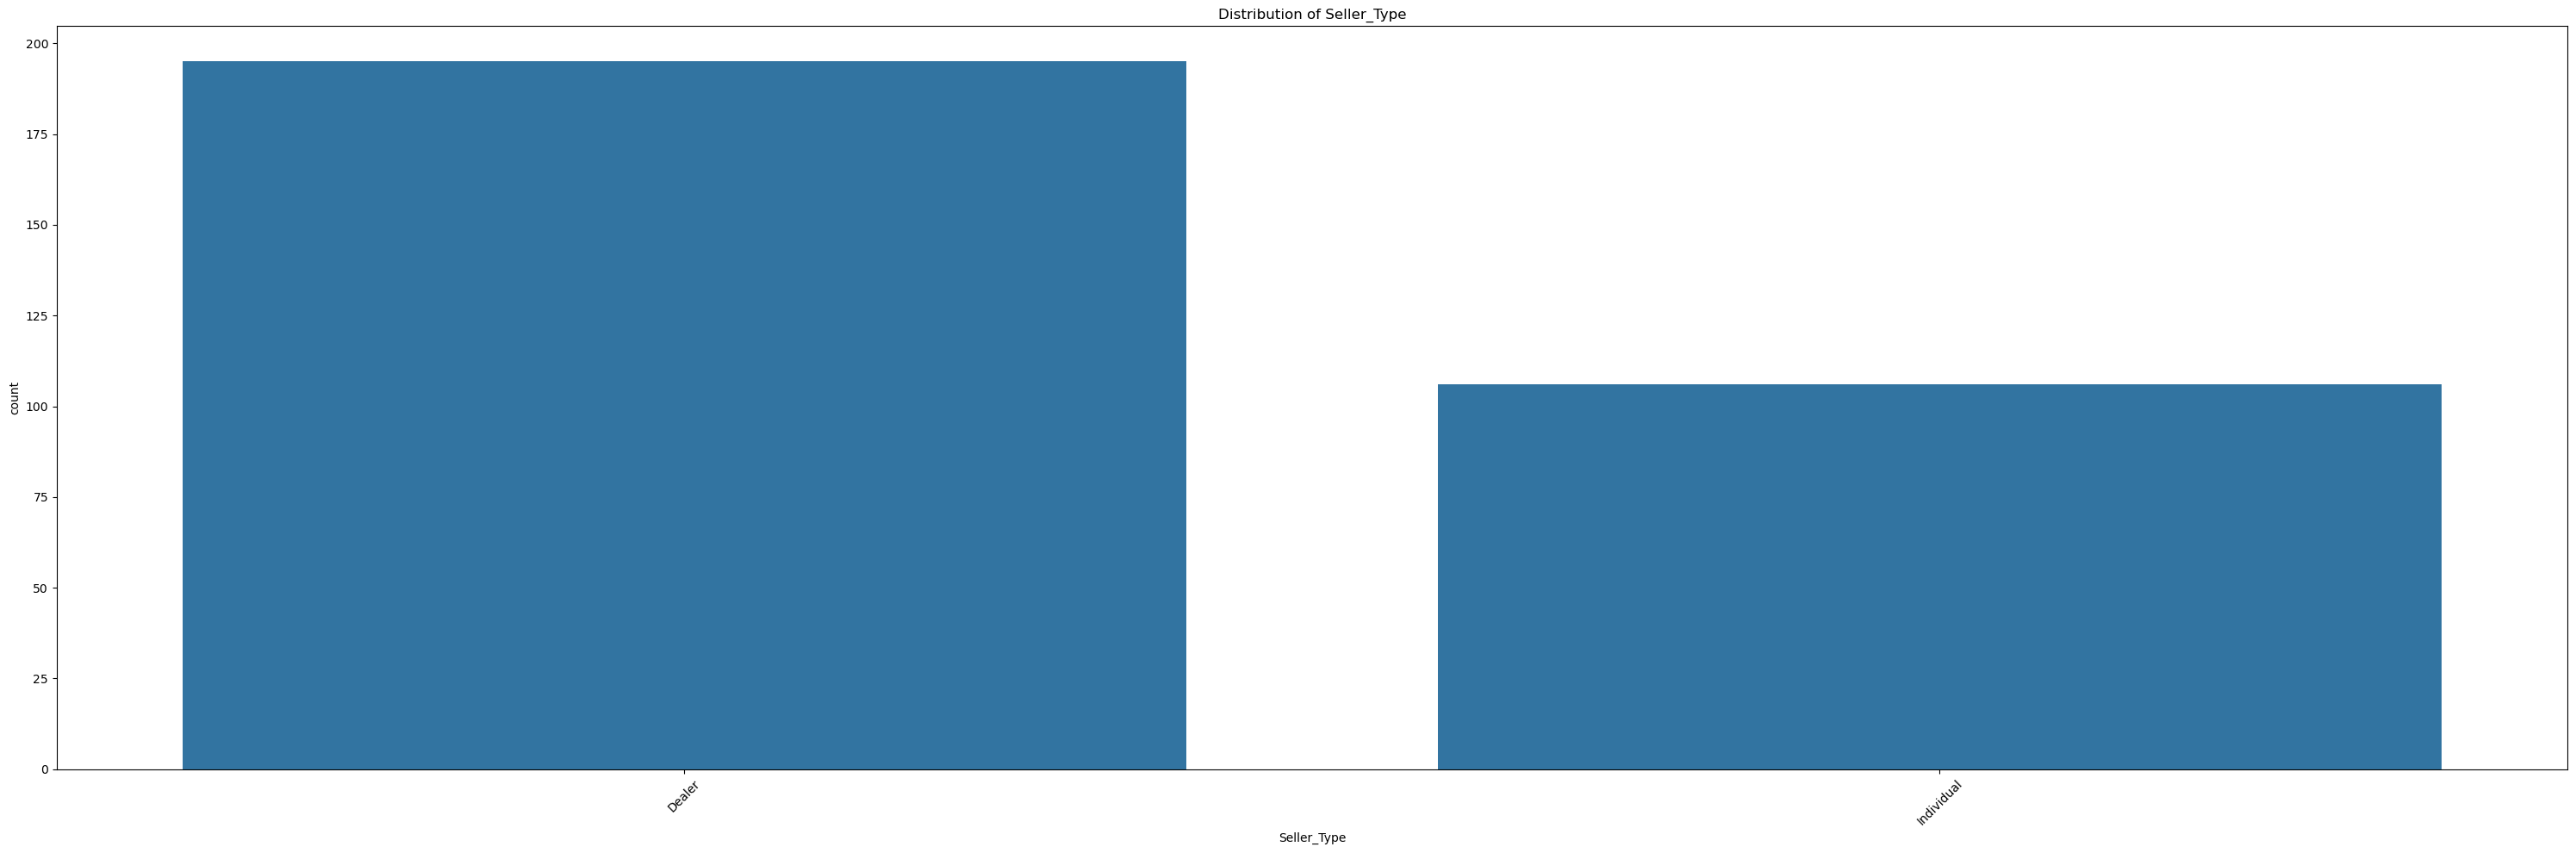

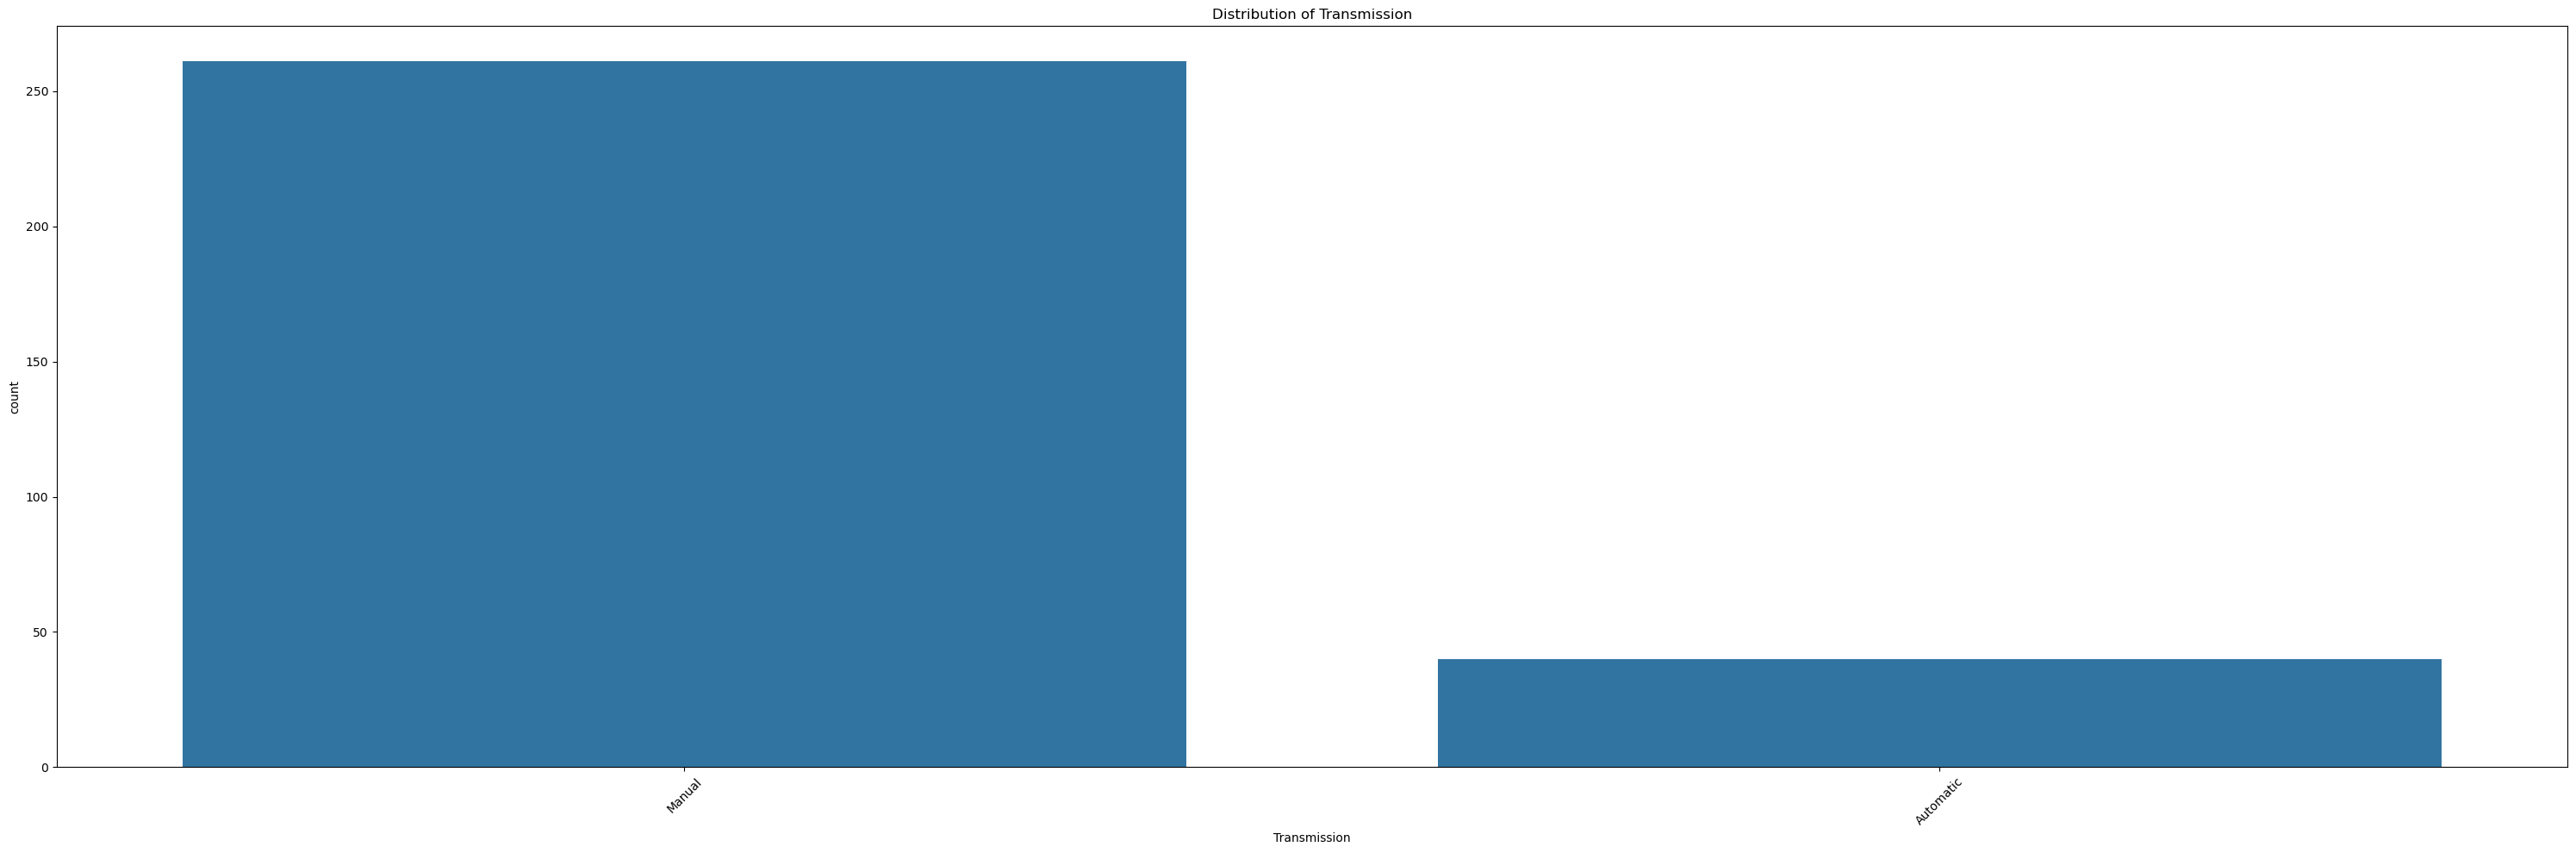

In [37]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(30, 10))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

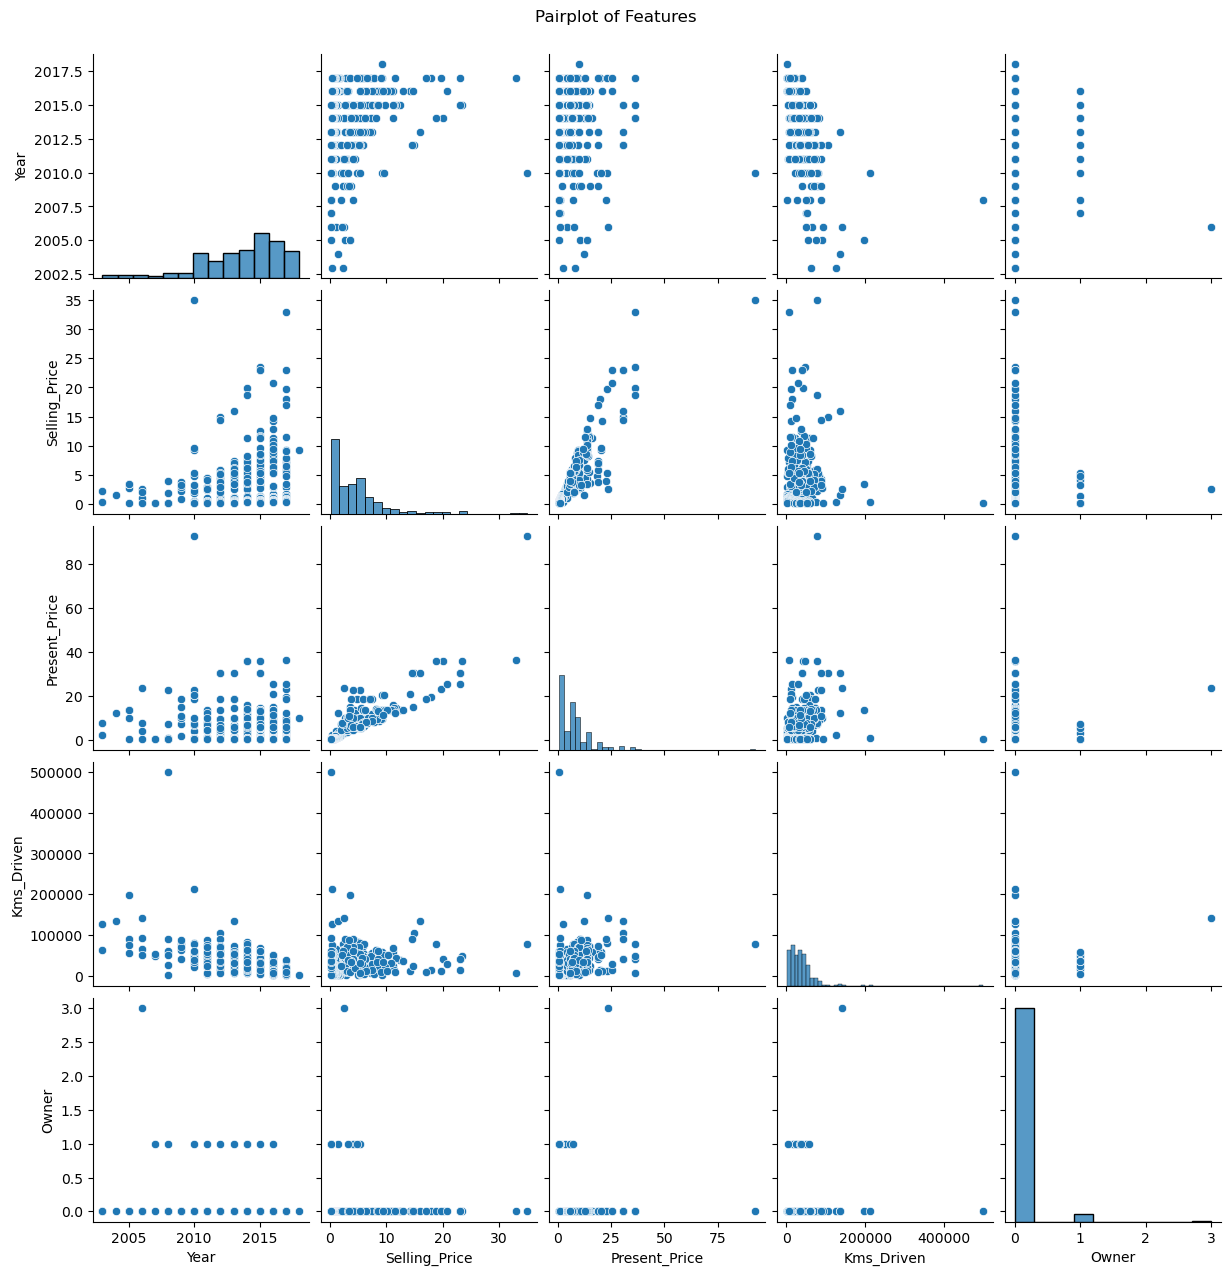

In [38]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

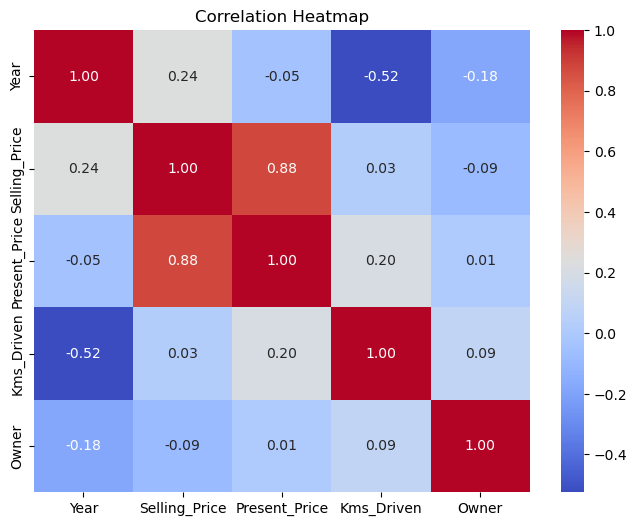

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
label_enc = LabelEncoder()
df['Seller_Type'] = label_enc.fit_transform(df['Seller_Type'])
df['Transmission'] = label_enc.fit_transform(df['Transmission'])
df['Fuel_Type'] = label_enc.fit_transform(df['Fuel_Type'])

In [41]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [42]:
scaler = StandardScaler()

In [43]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [44]:
print("\nFinal Preprocessed Data:")
print(df.head())


Final Preprocessed Data:
  Car_Name      Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  0.128897      -0.258416      -0.236215   -0.256224          2   
1      sx4 -0.217514       0.017481       0.221505    0.155911          1   
2     ciaz  1.168129       0.510154       0.257427   -0.773969          2   
3  wagon r -0.910335      -0.356950      -0.403079   -0.817758          2   
4    swift  0.128897      -0.012079      -0.087890    0.141743          1   

   Seller_Type  Transmission     Owner  
0            0             1 -0.174501  
1            0             1 -0.174501  
2            0             1 -0.174501  
3            0             1 -0.174501  
4            0             1 -0.174501  


In [25]:

# Selected numerical features
features = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']

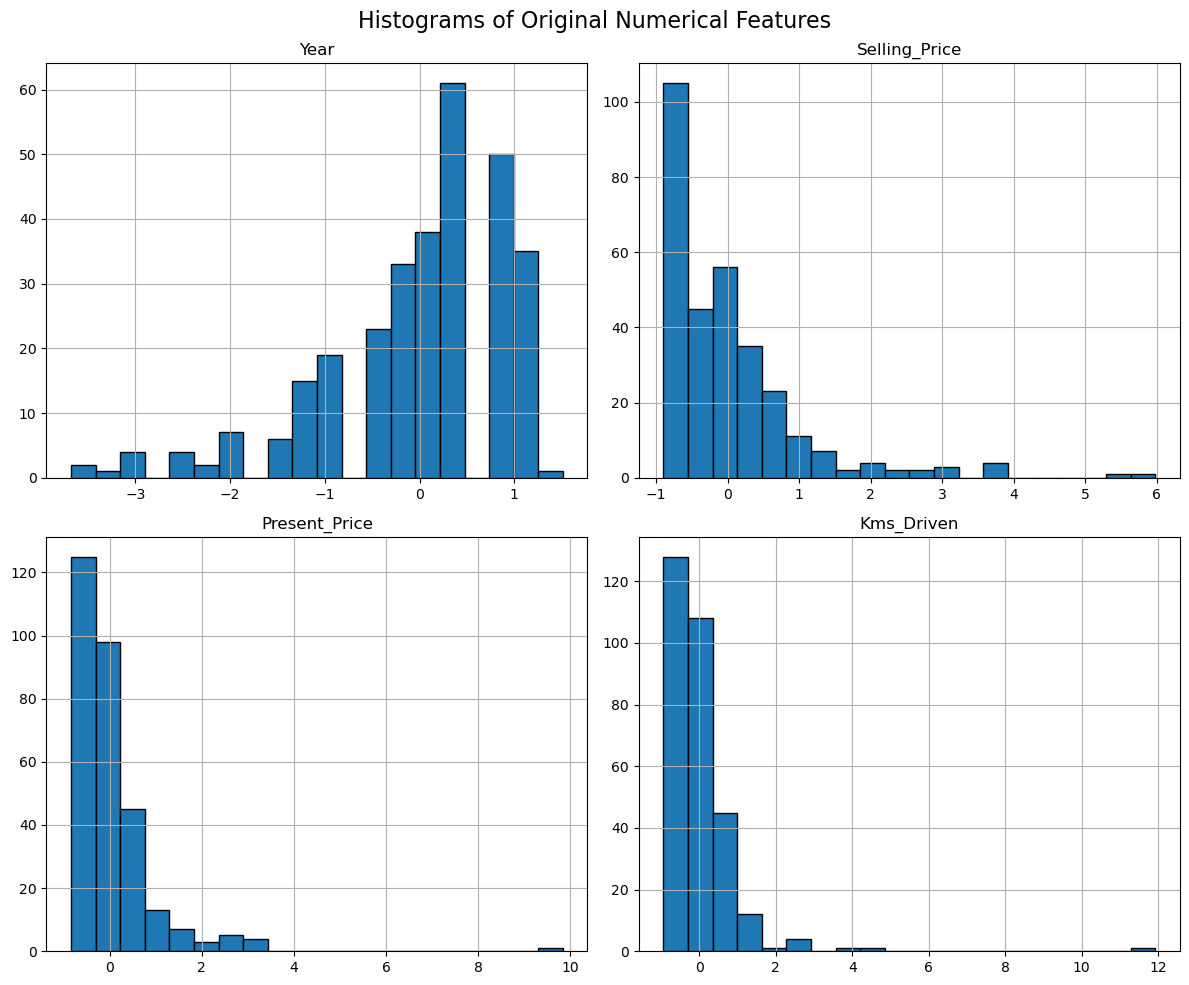

In [46]:
df[features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Original Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

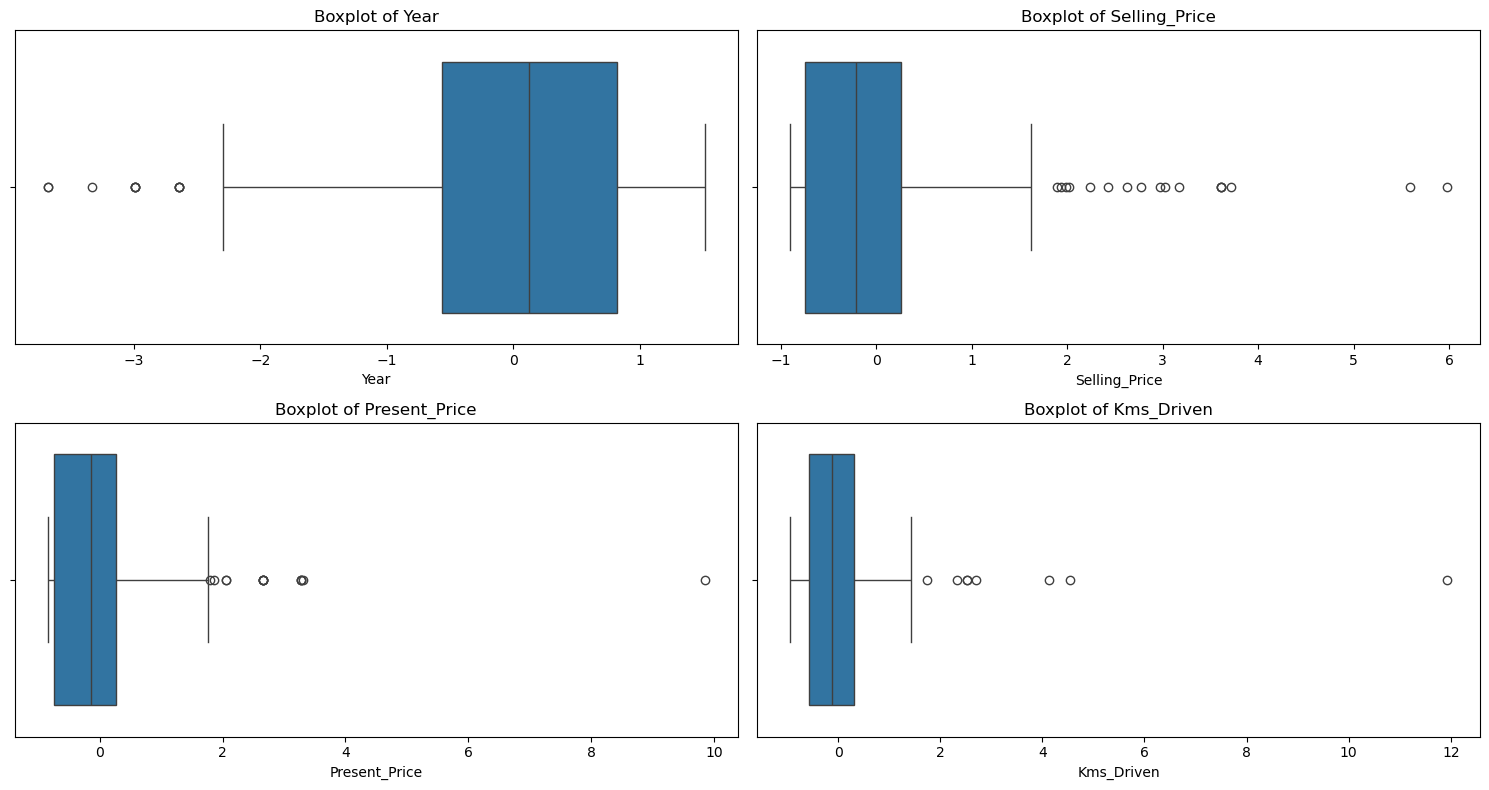

In [48]:
# Boxplots for selected features
plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, (len(features) + 1) // 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()